# NLP with SpaCy

## Import SpaCy

In [1]:
import spacy
nlp = spacy.load('en_core_web_sm')
nlp

In [2]:
# nlp encapsulates the entire nlp pipeline
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [3]:
# sample text for doc demo
# define text for demonstration
sample_text = "While running in Central Park, \nI noticed a discarded McDonald's container,surounded by buzzing flies was annoying."
print(sample_text)

While running in Central Park, 
I noticed a discarded McDonald's container,surounded by buzzing flies was annoying.


### Docs

In [4]:
# Create a doc with the nlp pipeline
doc = nlp(sample_text)
type(doc)

spacy.tokens.doc.Doc

In [5]:
# docs look like original text when displayed
print(sample_text)
doc

While running in Central Park, 
I noticed a discarded McDonald's container,surounded by buzzing flies was annoying.


While running in Central Park, 
I noticed a discarded McDonald's container,surounded by buzzing flies was annoying.

### Token objects within docs

In [6]:
for token in doc:
    print(token)

While
running
in
Central
Park
,


I
noticed
a
discarded
McDonald
's
container
,
surounded
by
buzzing
flies
was
annoying
.


## Token Attributes

In [7]:
# slice token from doc
token = doc[1]
token

running

### token.text: original form of the word

In [8]:
print(token.text)

running


### token.lemma_: the base or root form of the word

In [9]:
print(token.lemma_)

run


### token.pos_: The part-of-speech tag associated with the token

In [10]:
print(token.pos_)

VERB


###  token.is_stop: Boolean flag to check if the token is a stop word

In [11]:
print(token.is_stop)

False


### token.is_punct: Boolean flag to check if the token is punctuation

In [12]:
print(token.is_punct)

False


### loop through each token, create dict for each token, convert to df

In [13]:
import pandas as pd
# Create dictionary for desired attributes for each token
token_data = []
for token in doc:
    token_dict = {
        ".text": token.text,
        ".lemma_": token.lemma_,
        ".pos_": token.pos_,
        ".is_stop": token.is_stop,
        ".is_punct": token.is_punct,
        ".is_space": token.is_space
    }
    token_data.append(token_dict)
# Save dictionary as a dataframe
spacy_df = pd.DataFrame(token_data) 
spacy_df.head(10)

,.text,.lemma_,.pos_,.is_stop,.is_punct,.is_space
0,While,while,SCONJ,True,False,False
1,running,run,VERB,False,False,False
2,in,in,ADP,True,False,False
3,Central,Central,PROPN,False,False,False
4,Park,Park,PROPN,False,False,False
5,",",",",PUNCT,False,True,False
6,\n,\n,SPACE,False,False,True
7,I,I,PRON,True,False,False
8,noticed,notice,VERB,False,False,False
9,a,a,DET,True,False,False


## Preprocessing with SpaCy

### Remove stop words

In [14]:
# empty list to collect tokens after cleaning
cleaned_tokens = []

In [15]:
# loop to remove stop words
for token in doc:
    if token.is_stop == True:
        continue
    else:
        cleaned_tokens.append(token.text.lower())
print(cleaned_tokens)

['running', 'central', 'park', ',', '\n', 'noticed', 'discarded', 'mcdonald', 'container', ',', 'surounded', 'buzzing', 'flies', 'annoying', '.']


### Remove punctuation and whitespace

In [16]:
## Adding onto our preprocessing for loop
# For loop to remove stopwords & punctuation
cleaned_tokens = []
# For each token 
for token in doc:
    
    # If the token is a stopword,
    if token.is_stop == True:
        # skip it and move onto next token
        continue 
    ##NEW: 
    # if the token is punctuation,
    if token.is_punct == True:
        # skip it and move onto next token
        continue
    # if the token is a whitespace  (spaces, new lines, etc)
    if token.is_space == True:
        # skip it and move onto next token
        continue
    
    # Otherwise,
    else: 
        # keep the tokens'.text for the final list of tokens
        cleaned_tokens.append(token.text.lower())
        
print(cleaned_tokens)

['running', 'central', 'park', 'noticed', 'discarded', 'mcdonald', 'container', 'surounded', 'buzzing', 'flies', 'annoying']


### obtain lemmas

In [17]:
## Adding onto our preprocessing for loop
# For loop to remove stopwords & punctuation
cleaned_lemmas = []
# For each token 
for token in doc:
    
    # If the token is a stopword,
    if token.is_stop == True:
        # skip it and move onto next token
        continue 
    
    # if the token is punctuation,
    if token.is_punct == True:
        # skip it and move onto next token
        continue
    # if the token is a whitespace  (spaces, new lines, etc)
    if token.is_space == True:
        # skip it and move onto next token
        continue
    
    # Otherwise,
    else: 
        # # keep the tokens'.text for the final list of tokens
        # cleaned_tokens.append(token.text.lower())
        # keep the tokens's .lemma_ for the final list of tokens
        cleaned_lemmas.append(token.lemma_.lower())
        
print(cleaned_lemmas)

['run', 'central', 'park', 'notice', 'discard', 'mcdonald', 'container', 'surounde', 'buzz', 'fly', 'annoying']


### compare cleaned tokens vs. cleaned lemmas

In [18]:
# Compare text and lemmas
print("Tokenized words:\n", cleaned_tokens,"\n")
print("Lemmatized words:\n", cleaned_lemmas)

Tokenized words:
 ['running', 'central', 'park', 'noticed', 'discarded', 'mcdonald', 'container', 'surounded', 'buzzing', 'flies', 'annoying'] 

Lemmatized words:
 ['run', 'central', 'park', 'notice', 'discard', 'mcdonald', 'container', 'surounde', 'buzz', 'fly', 'annoying']


## Define function for preprocessing with SpaCy

In [19]:
# define function

def preprocess_doc(doc, remove_stopwords=True, remove_punct=True, use_lemmas=False):
    """Temporary Fucntion - for Education Purposes (we will make something better below)
    """
    tokens = [ ]
    for token in doc:
        # Check if should remove stopwords and if token is stopword
        if (remove_stopwords == True) and (token.is_stop == True):
            # Continue the loop with the next token
            continue
    
        # Check if should remove stopwords and if token is stopword
        if (remove_punct == True) and (token.is_punct == True):
            continue
    
        # Check if should remove stopwords and if token is stopword
        if (remove_punct == True) and (token.is_space == True):
            continue
    
        ## Determine final form of output list of tokens/lemmas
        if use_lemmas:
            tokens.append(token.lemma_.lower())
        else:
            tokens.append(token.text.lower())
    return tokens

In [20]:
# run function with false args

# Convert the text to a doc.
doc = nlp(sample_text)
# Tokenizing, keeping stopwords and punctuatin
dirty_tokens = preprocess_doc(doc, remove_stopwords=False,remove_punct=False)
print(dirty_tokens)

['while', 'running', 'in', 'central', 'park', ',', '\n', 'i', 'noticed', 'a', 'discarded', 'mcdonald', "'s", 'container', ',', 'surounded', 'by', 'buzzing', 'flies', 'was', 'annoying', '.']


In [21]:
# run function with true args
# Tokenizing, removing stopwords and punctuation
cleaned_tokens = preprocess_doc(doc, remove_stopwords=True,remove_punct=True)
print(cleaned_tokens)

['running', 'central', 'park', 'noticed', 'discarded', 'mcdonald', 'container', 'surounded', 'buzzing', 'flies', 'annoying']


In [22]:
# run function with all true args
# Lemmatizing, removing stopwords and punctuation
cleaned_lemmas = preprocess_doc(doc, remove_stopwords=True,remove_punct=True, use_lemmas=True)
print(cleaned_lemmas)

['run', 'central', 'park', 'notice', 'discard', 'mcdonald', 'container', 'surounde', 'buzz', 'fly', 'annoying']


## Batch Preprocessing with SpaCy

To do so, we do not process our doc with the nlp pipeline directly, as before.

Instead, we begin a for loop through through a collection of texts. nlp.pipe(list_of_texts)

In [23]:
# define batch function
def batch_preprocess_texts(
    texts,
    nlp=None,
    remove_stopwords=True,
    remove_punct=True,
    use_lemmas=False,
    disable=["ner"],
    batch_size=50,
    n_process=-1,
):
    """Efficiently preprocess a collection of texts using nlp.pipe()
    Args:
        texts (collection of strings): collection of texts to process (e.g. df['text'])
        nlp (spacy pipe), optional): Spacy nlp pipe. Defaults to None; if None, it creates a default 'en_core_web_sm' pipe.
        remove_stopwords (bool, optional): Controls stopword removal. Defaults to True.
        remove_punct (bool, optional): Controls punctuation removal. Defaults to True.
        use_lemmas (bool, optional): lemmatize tokens. Defaults to False.
        disable (list of strings, optional): named pipeline elements to disable. Defaults to ["ner"]: Used with nlp.pipe(disable=disable)
        batch_size (int, optional): Number of texts to process in a batch. Defaults to 50.
        n_process (int, optional): Number of CPU processors to use. Defaults to -1 (meaning all CPU cores).
    Returns:
        list of tokens
    """
    # from tqdm.notebook import tqdm
    from tqdm import tqdm
    if nlp is None:
        nlp = spacy.load("en_core_web_sm")
    processed_texts = []
    for doc in tqdm(nlp.pipe(texts, disable=disable, batch_size=batch_size, n_process=n_process)):
        tokens = []
        for token in doc:
            # Check if should remove stopwords and if token is stopword
            if (remove_stopwords == True) and (token.is_stop == True):
                # Continue the loop with the next token
                continue
            # Check if should remove stopwords and if token is stopword
            if (remove_punct == True) and (token.is_punct == True):
                continue
            # Check if should remove stopwords and if token is stopword
            if (remove_punct == True) and (token.is_space == True):
                continue
            
            ## Determine final form of output list of tokens/lemmas
            if use_lemmas:
                tokens.append(token.lemma_.lower())
            else:
                tokens.append(token.text.lower())
        processed_texts.append(tokens)
    return processed_texts

In [24]:
# run function

# Default args will produce tokens
tokens = batch_preprocess_texts([sample_text])
tokens = tokens[0]
print(tokens)

1it [00:18, 18.63s/it]

['running', 'central', 'park', 'noticed', 'discarded', 'mcdonald', 'container', 'surounded', 'buzzing', 'flies', 'annoying']


### More with SpaCy docs (metadata)

In [25]:
# Extracting sentences from doc

sample_text = "While running in Central Park, I noticed that the constant buzzing of flies was annoying. However, I couldn't be too upset as they were likely attracted to the McDonald's food that someone carelessly dropped. I wondered, 'How can they be so uncaring?'"
doc = nlp(sample_text)


sentences = list(doc.sents)
len(sentences)

3

In [26]:
# Display the first sentence
sentences[0]

While running in Central Park, I noticed that the constant buzzing of flies was annoying.

In [27]:
# Print any named entities in the doc and its label
for ent in doc.ents:
    print(ent.text, ent.label_)

Central Park LOC
McDonald ORG


# Practice - SpaCy and FreqDist

Return to the Dracula text from the word clouds practice assignment. You can continue working in the same notebook. (Bram Stoker's Dracula text found here. Refer to the top of the lesson "Word Cloud" for assistance in reading in the .txt. data.)ms_texts function

## Load data

In [31]:
# load data
# Define the filepath
fpath= "Data/Dracula.txt"
# Use with open syntax
with open(fpath, encoding = "utf-8") as f:
    txt = f.read()
# Report length of the text
print(f"There are {len(txt)} characters in the full text.\n")

There are 846555 characters in the full text.



## Imports

In [32]:
# packages

from nltk.probability import FreqDist

In [33]:
# functions
def batch_preprocess_texts(
    texts,
    nlp=None,
    remove_stopwords=True,
    remove_punct=True,
    use_lemmas=False,
    disable=["ner"],
    batch_size=50,
    n_process=-1,
):
    """Efficiently preprocess a collection of texts using nlp.pipe()
    Args:
        texts (collection of strings): collection of texts to process (e.g. df['text'])
        nlp (spacy pipe), optional): Spacy nlp pipe. Defaults to None; if None, it creates a default 'en_core_web_sm' pipe.
        remove_stopwords (bool, optional): Controls stopword removal. Defaults to True.
        remove_punct (bool, optional): Controls punctuation removal. Defaults to True.
        use_lemmas (bool, optional): lemmatize tokens. Defaults to False.
        disable (list of strings, optional): named pipeline elements to disable. Defaults to ["ner"]: Used with nlp.pipe(disable=disable)
        batch_size (int, optional): Number of texts to process in a batch. Defaults to 50.
        n_process (int, optional): Number of CPU processors to use. Defaults to -1 (meaning all CPU cores).
    Returns:
        list of tokens
    """
    # from tqdm.notebook import tqdm
    from tqdm import tqdm
    if nlp is None:
        nlp = spacy.load("en_core_web_sm")
    processed_texts = []
    for doc in tqdm(nlp.pipe(texts, disable=disable, batch_size=batch_size, n_process=n_process)):
        tokens = []
        for token in doc:
            # Check if should remove stopwords and if token is stopword
            if (remove_stopwords == True) and (token.is_stop == True):
                # Continue the loop with the next token
                continue
            # Check if should remove stopwords and if token is stopword
            if (remove_punct == True) and (token.is_punct == True):
                continue
            # Check if should remove stopwords and if token is stopword
            if (remove_punct == True) and (token.is_space == True):
                continue
            
            ## Determine final form of output list of tokens/lemmas
            if use_lemmas:
                tokens.append(token.lemma_.lower())
            else:
                tokens.append(token.text.lower())
        processed_texts.append(tokens)
    return processed_texts

### the 30 most common tokens in Dracula

In [35]:
# run function to get tokens
tokens = batch_preprocess_texts([txt])

1it [00:25, 25.29s/it]


In [36]:
tokens = tokens[0]

In [37]:
# view tokens
tokens

['dracula',
 'bram',
 'stoker',
 'illustration',
 'colophon',
 'new',
 'york',
 'grosset',
 'dunlap',
 'publishers',
 'copyright',
 '1897',
 'united',
 'states',
 'america',
 'according',
 'act',
 'congress',
 'bram',
 'stoker',
 'rights',
 'reserved',
 'printed',
 'united',
 'states',
 'country',
 'life',
 'press',
 'garden',
 'city',
 'n.y.',
 'dear',
 'friend',
 'hommy',
 'beg',
 'contents',
 'chapter',
 'i.',
 'jonathan',
 'harker',
 'journal',
 'chapter',
 'ii',
 'jonathan',
 'harker',
 'journal',
 'chapter',
 'iii',
 'jonathan',
 'harker',
 'journal',
 'chapter',
 'iv',
 'jonathan',
 'harker',
 'journal',
 'chapter',
 'v.',
 'letters',
 'lucy',
 'mina',
 'chapter',
 'vi',
 'mina',
 'murray',
 'journal',
 'chapter',
 'vii',
 'cutting',
 'dailygraph',
 '8',
 'august',
 'chapter',
 'viii',
 'mina',
 'murray',
 'journal',
 'chapter',
 'ix',
 'mina',
 'murray',
 'journal',
 'chapter',
 'x.',
 'mina',
 'murray',
 'journal',
 'chapter',
 'xi',
 'lucy',
 'westenra',
 'diary',
 'chapter',

In [38]:
# initialize freqdist obj
dist = FreqDist(tokens)

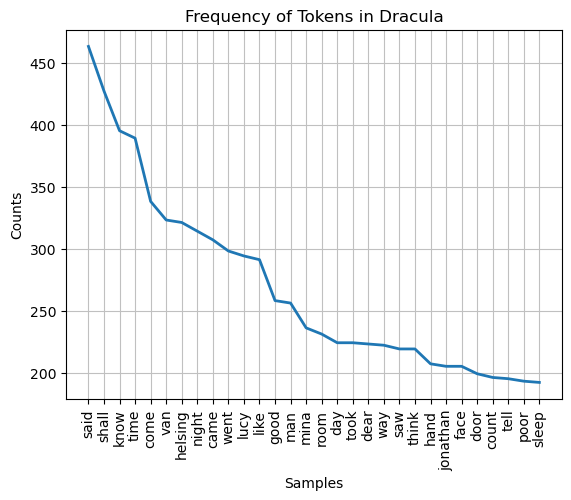

In [41]:
dist.plot(30, title='Frequency of Tokens in Dracula');

### the 30 most common lemmas in Dracula

In [65]:
# Use custom function to obtain lemmas (add use_lemmas = True)
lemmas = batch_preprocess_texts([txt], use_lemmas = True)
lemmas = lemmas[0]
lemmas[:20]

1it [00:26, 26.42s/it]


['dracula',
 'bram',
 'stoker',
 'illustration',
 'colophon',
 'new',
 'york',
 'grosset',
 'dunlap',
 'publisher',
 'copyright',
 '1897',
 'united',
 'states',
 'america',
 'accord',
 'act',
 'congress',
 'bram',
 'stoker']

In [66]:
dist = FreqDist(lemmas)

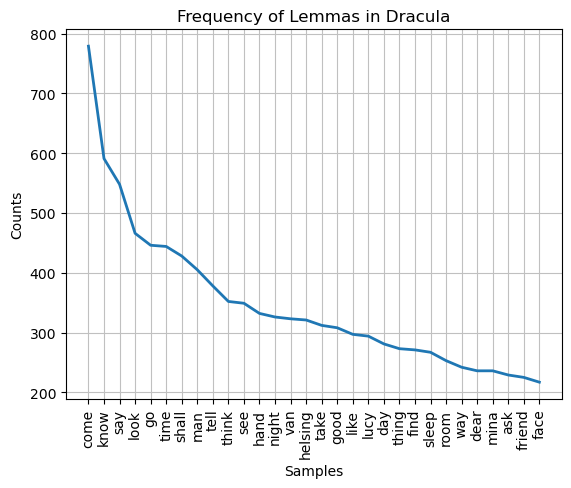

In [67]:
dist.plot(30, title='Frequency of Lemmas in Dracula');